# Annotations generation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ../AlphaPose

/code/AlphaPose


## AlphaPose

[Official GitHub repository](https://github.com/MVIG-SJTU/AlphaPose.git)

In [3]:
!mkdir detector/yolo/data
!mkdir detector/tracker/data
!ln -s /code/shared_memory/detector/yolo/data/yolov3-spp.weights ./detector/yolo/data/yolov3-spp.weights
!ln -s /code/shared_memory/detector/tracker/data/jde.1088x608.uncertainty.pt ./detector/tracker/jde.1088x608.uncertainty.pt

mkdir: cannot create directory ‘detector/yolo/data’: File exists
mkdir: cannot create directory ‘detector/tracker/data’: File exists
ln: failed to create symbolic link './detector/yolo/data/yolov3-spp.weights': File exists
ln: failed to create symbolic link './detector/tracker/jde.1088x608.uncertainty.pt': File exists


### Installation verification

In the following, the steps reported in the `Getting started` section of the official repository are repeated in order to verify the installation of the library.

In [5]:
!python scripts/demo_inference.py --cfg configs/coco/resnet/256x192_res50_lr1e-3_1x.yaml \
--checkpoint ../shared_memory/pretrained_models/fast_res50_256x192.pth \
--detbatch 1 --posebatch 30 --indir examples/demo/ --save_img

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
  1%|▎                                      | 656k/97.8M [00:00<00:47, 2.15MB/s]Loading YOLO model..
100%|██████████████████████████████████████| 97.8M/97.8M [00:46<00:00, 2.19MB/s]
Loading pose model from ../shared_memory/pretrained_models/fast_res50_256x192.pth...
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.26it/s]
===========================> Finish Model Running.
===========================> Rendering remaining images in the queue...
===========================> If this step takes too long, you can enable the --vis_fast flag to use fast rendering (real-time).
===========================> Rendering remaining 0 images in the queue...
Results have been written to json.


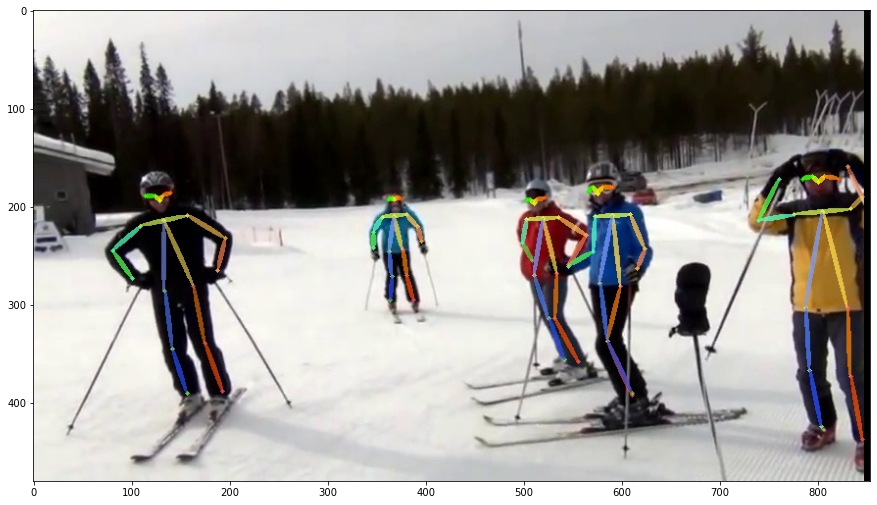

In [6]:
import matplotlib.pyplot as plt
img = plt.imread('examples/res/vis/1.jpg')
plt.figure(figsize=(15,12))
plt.imshow(img)

### Datasets

Extract the frames from the videos if necessary

In [8]:
### Courtesy of https://stackoverflow.com/questions/33311153/python-extracting-and-saving-video-frames

# create a folder to store extracted images
import os
import cv2
from glob import glob
from tqdm import tqdm
from natsort import natsorted


def video_to_frames_new(video, out_video_frames):
    os.mkdir(out_video_frames)
    # use opencv to do the job
    vidcap = cv2.VideoCapture(video)
    count = 0
    while True:
        success,image = vidcap.read()
        if not success:
            vidcap.release()
            break
        cv2.imwrite(os.path.join(out_video_frames,"{:d}.jpg".format(count+1)), image)     # save frame as JPEG file
        count += 1
    print("{} images are extacted in {}.".format(count,out_video_frames))
    
    
if __name__=="__main__":

    input_loc = r'/code/shared_memory/data/Scene13/'
    output_loc = r'/code/shared_memory/data/Scene13/frames/'
    

    try:
        os.mkdir(output_loc)
    except:
        pass

    for video in tqdm(natsorted(glob(os.path.join(input_loc, '*.mp4')))):
        out_video_frames = os.path.join(output_loc, video.split('/')[-1].split('.')[0])
        if not os.path.exists(out_video_frames):
            video_to_frames_new(video, out_video_frames)

  4%|██████▉                                                                                                                                                                       | 1/25 [00:07<02:56,  7.36s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/abnormal_scene_13_scenario_1.



  8%|█████████████▉                                                                                                                                                                | 2/25 [00:13<02:38,  6.89s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/abnormal_scene_13_scenario_1_fog.



 12%|████████████████████▉                                                                                                                                                         | 3/25 [00:18<02:22,  6.48s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/abnormal_scene_13_scenario_2_fog.



 16%|███████████████████████████▊                                                                                                                                                  | 4/25 [00:25<02:16,  6.49s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/abnormal_scene_13_scenario_3.



 20%|██████████████████████████████████▊                                                                                                                                           | 5/25 [00:32<02:14,  6.72s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/abnormal_scene_13_scenario_3_fog.



 24%|█████████████████████████████████████████▊                                                                                                                                    | 6/25 [00:40<02:13,  7.02s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/abnormal_scene_13_scenario_4.



 28%|████████████████████████████████████████████████▋                                                                                                                             | 7/25 [00:47<02:07,  7.06s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/abnormal_scene_13_scenario_4_fog.



 32%|███████████████████████████████████████████████████████▋                                                                                                                      | 8/25 [00:55<02:04,  7.35s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/abnormal_scene_13_scenario_5.



 36%|██████████████████████████████████████████████████████████████▋                                                                                                               | 9/25 [01:03<01:59,  7.49s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/abnormal_scene_13_scenario_5_fog.



 40%|█████████████████████████████████████████████████████████████████████▏                                                                                                       | 10/25 [01:11<01:54,  7.65s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/abnormal_scene_13_scenario_6.



 44%|████████████████████████████████████████████████████████████████████████████                                                                                                 | 11/25 [01:19<01:49,  7.82s/it]

446 images are extacted in /code/shared_memory/data/Scene13/frames/abnormal_scene_13_scenario_7.



 48%|███████████████████████████████████████████████████████████████████████████████████                                                                                          | 12/25 [01:27<01:41,  7.78s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/abnormal_scene_13_scenario_8.



 52%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                   | 13/25 [01:35<01:36,  8.00s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/abnormal_scene_13_scenario_9.



 56%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 14/25 [01:43<01:27,  7.92s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/normal_scene_13_scenario_1.



 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 15/25 [01:50<01:16,  7.60s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/normal_scene_13_scenario_1_fog.



 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 16/25 [01:58<01:10,  7.79s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/normal_scene_13_scenario_2.



 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 17/25 [02:05<01:00,  7.56s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/normal_scene_13_scenario_2_fog.



 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 18/25 [02:13<00:54,  7.76s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/normal_scene_13_scenario_3.



 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 19/25 [02:20<00:45,  7.56s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/normal_scene_13_scenario_3_fog.



 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 20/25 [02:28<00:37,  7.59s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/normal_scene_13_scenario_4.



 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 21/25 [02:35<00:29,  7.32s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/normal_scene_13_scenario_4_fog.



 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 22/25 [02:42<00:22,  7.34s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/normal_scene_13_scenario_5.



 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 23/25 [02:50<00:15,  7.57s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/normal_scene_13_scenario_6.



 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 24/25 [02:57<00:07,  7.44s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/normal_scene_13_scenario_7.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [03:06<00:00,  7.45s/it]

451 images are extacted in /code/shared_memory/data/Scene13/frames/normal_scene_13_scenario_8.


### UBnormal

In [11]:
import shlex
import os
from tqdm import tqdm
import datetime
from glob import glob
from natsort import natsorted

for scene_path in natsorted(glob('../shared_memory/data/*')):
    scene = os.path.basename(scene_path)
    print(scene)
    for clip in tqdm(natsorted(glob(os.path.join(scene_path, 'frames/*')))):

        os.environ['indir'] = shlex.quote(clip)
        os.environ['outdir'] = shlex.quote(os.path.join('../shared_memory/res/', scene, os.path.basename(clip)))
        try: 
            os.makedirs(os.environ['outdir'], exist_ok=True)
        except:
            pass

        !python -W ignore scripts/demo_inference.py \
        --cfg configs/coco/resnet/256x192_res50_lr1e-3_1x.yaml \
        --checkpoint ../shared_memory/pretrained_models/fast_res50_256x192.pth --detbatch 1 \
        --posebatch 24 --indir $indir --outdir $outdir --sp

        print('\n#### Start tracking....{}'.format(datetime.datetime.now()))

        !python -W ignore trackers/PoseFlow/tracker-general.py \
        --imgdir $indir \
        --in_json $outdir/alphapose-results.json \
        --out_json $outdir/alphapose-results-forvis-tracked.json       


  0%|                                                                                                                                                                                       | 0/1 [00:00<?, ?it/s]

Scene20
Loading YOLO model..
Loading pose model from ../shared_memory/pretrained_models/fast_res50_256x192.pth...
100%|█████████████████████████████████████████| 471/471 [03:53<00:00,  2.01it/s]
===========================> Finish Model Running.
Results have been written to json.

#### Start tracking....2022-05-02 11:29:17.446927
Start loading json file...

100%|██████████████████████████████████████████| 468/468 [00:14<00:00, 32.4it/s]
ORB matching frame pairs ...

100%|██████████████████████████████████████████| 467/467 [04:59<00:00, 1.56it/s]
Start pose tracking...

100%|█████████████████████████████████████████| 470/470 [04:22<00:00,  1.79it/s]
This video contains 34 people.
Export tracking results to json...

100%|█████████████████████████████████████| 471/471 [00:00<00:00, 173916.47it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [13:51<00:00, 831.32s/it]


### HockeyFight

In [ ]:
import shlex
import os


try:
    os.mkdir('../shared_memory/res/hockeyfight/')
except:
    pass

log = []

for video_prefix, start in zip(('NV', 'V'), (451,451)):
    
    for i in range(start, 501):
        
        indir = shlex.quote(f'../shared_memory/data/hockeyfight/frames/{video_prefix} ({i})')
        outdir = shlex.quote(f'../shared_memory/res/hockeyfight/{video_prefix} ({i})')
#         visdir = shlex.quote(f'../shared_memory/res/hockeyfight/{video_prefix} ({i})/poseflow')
        try: 
            os.mkdir(outdir)
        except:
            pass
        
#         try:
#             os.mkdir(visdir)
#         except:
#             pass

        try:
            os.system('python -W ignore scripts/demo_inference.py \
                       --cfg configs/coco/resnet/256x192_res50_lr1e-3_1x.yaml \
                       --checkpoint ../shared_memory/pretrained_models/fast_res50_256x192.pth --detbatch 1 \
                       --posebatch 20 --indir {} --outdir {} --sp'.format(indir, outdir))

            os.system('python -W ignore trackers/PoseFlow/tracker-general.py \
                       --imgdir {} \
                       --in_json {}/alphapose-results.json \
                       --out_json {}/alphapose-results-forvis-tracked.json \
                       '.format(indir, outdir, outdir))
#                    --visdir {}'.format(indir, outdir, outdir, visdir))
        except:
            log.append(i)
print(log)

### RE-DID

In [3]:
import shlex
import os
from tqdm import tqdm


try:
    os.mkdir('../shared_memory/res/RE-DID/')
except:
    pass

log = []

    
for i in tqdm(range(16, 31)):
        
    indir = shlex.quote('../shared_memory/data/RE-DID/frames/pos_{:03d}'.format(i))
    outdir = shlex.quote('../shared_memory/res/RE-DID/pos_{:03d}'.format(i))
#     visdir = shlex.quote('../shared_memory/res/RE-DID/pos_{:03d}/poseflow'.format(i))
    try: 
        os.mkdir(outdir)
    except:
        pass

#         try:
#             os.mkdir(visdir)
#         except:
#             pass

    try:
        os.system('python -W ignore scripts/demo_inference.py \
                   --cfg configs/coco/resnet/256x192_res50_lr1e-3_1x.yaml \
                   --checkpoint ../shared_memory/pretrained_models/fast_res50_256x192.pth --detbatch 1 \
                   --posebatch 20 --indir {} --outdir {} --sp'.format(indir, outdir))

        os.system('python -W ignore trackers/PoseFlow/tracker-general.py \
                   --imgdir {} \
                   --in_json {}/alphapose-results.json \
                   --out_json {}/alphapose-results-forvis-tracked_new.json \
                   '.format(indir, outdir, outdir))
#                    --visdir {}'.format(indir, outdir, outdir, visdir))                
    except:
        log.append(i)
print(log)

100%|██████████| 3629/3629 [17:06<00:00,  3.54it/s]                                                                                                                                        | 0/15 [00:00<?, ?it/s]


Loading YOLO model..
Loading pose model from ../shared_memory/pretrained_models/fast_res50_256x192.pth...
===========================> Finish Model Running.
Results have been written to json.
Start loading json file...



100%|██████████| 1.08k/1.08k [00:06<00:00, 156it/s]

ORB matching frame pairs ...




100%|██████████| 1.08k/1.08k [08:43<00:00, 2.06it/s]
  0%|          | 2/1082 [00:00<01:03, 17.05it/s]

Start pose tracking...



  7%|███████████▎                                                                                                                                                              | 1/15 [27:40<6:27:32, 1660.87s/it]

This video contains 39 people.
Export tracking results to json...



100%|██████████| 1022/1022 [06:52<00:00,  2.48it/s]


Loading YOLO model..
Loading pose model from ../shared_memory/pretrained_models/fast_res50_256x192.pth...
===========================> Finish Model Running.
Results have been written to json.
Start loading json file...



100%|██████████| 942/942 [00:13<00:00, 70.0it/s] 
  0%|          | 0.00/941 [00:00<?, ?it/s]

ORB matching frame pairs ...



  0%|          | 0/944 [00:00<?, ?it/s]

Start pose tracking...



 13%|██████████████████████▋                                                                                                                                                   | 2/15 [47:47<5:30:18, 1524.49s/it]

This video contains 62 people.
Export tracking results to json...



100%|██████████| 3641/3641 [18:54<00:00,  3.21it/s]


Loading YOLO model..
Loading pose model from ../shared_memory/pretrained_models/fast_res50_256x192.pth...
===========================> Finish Model Running.
Results have been written to json.
Start loading json file...



100%|██████████| 2.04k/2.04k [00:08<00:00, 235it/s]

ORB matching frame pairs ...




100%|██████████| 2.04k/2.04k [08:36<00:00, 3.95it/s]
  0%|          | 3/2044 [00:00<01:21, 25.10it/s]

Start pose tracking...



 20%|█████████████████████████████████▌                                                                                                                                      | 3/15 [1:18:20<5:23:26, 1617.18s/it]

This video contains 89 people.
Export tracking results to json...



100%|██████████| 2161/2161 [13:26<00:00,  2.68it/s]


Loading YOLO model..
Loading pose model from ../shared_memory/pretrained_models/fast_res50_256x192.pth...
===========================> Finish Model Running.
Results have been written to json.
Start loading json file...



100%|██████████| 2.16k/2.16k [00:19<00:00, 113it/s] 
  0%|          | 0.00/2.16k [00:00<?, ?it/s]

ORB matching frame pairs ...



100%|██████████| 2.16k/2.16k [10:40<00:00, 3.37it/s] 
  0%|          | 3/2160 [00:00<01:14, 29.04it/s]

Start pose tracking...



 27%|████████████████████████████████████████████▊                                                                                                                           | 4/15 [1:46:38<5:00:55, 1641.44s/it]

This video contains 143 people.
Export tracking results to json...



100%|██████████| 807/807 [05:03<00:00,  2.66it/s]

Loading YOLO model..
Loading pose model from ../shared_memory/pretrained_models/fast_res50_256x192.pth...
===========================> Finish Model Running.
Results have been written to json.


Start loading json file...



100%|██████████| 795/795 [00:08<00:00, 96.9it/s] 
  0%|          | 0.00/794 [00:00<?, ?it/s]

ORB matching frame pairs ...



  0%|          | 3/797 [00:00<00:43, 18.25it/s]

Start pose tracking...



 33%|████████████████████████████████████████████████████████                                                                                                                | 5/15 [1:57:46<3:44:54, 1349.47s/it]

This video contains 38 people.
Export tracking results to json...



100%|██████████| 5001/5001 [33:46<00:00,  2.47it/s]


Loading YOLO model..
Loading pose model from ../shared_memory/pretrained_models/fast_res50_256x192.pth...
===========================> Finish Model Running.
Results have been written to json.
Start loading json file...



100%|██████████| 4.95k/4.95k [00:54<00:00, 91.5it/s]

ORB matching frame pairs ...




100%|██████████| 4.95k/4.95k [21:14<00:00, 3.88it/s] 
  0%|          | 2/4948 [00:00<05:08, 16.04it/s]

Generate fake correspondence files...../shared_memory/data/RE-DID/frames/pos_021/408_4080_orb.txt
Start pose tracking...



100%|██████████| 4949/4949 [00:00<00:00, 366547.95it/s]


This video contains 334 people.
Export tracking results to json...



100%|██████████| 1713/1713 [12:01<00:00,  2.38it/s]█████████████████████▏                                                                                                    | 6/15 [3:05:15<5:23:54, 2159.36s/it]

Loading YOLO model..
Loading pose model from ../shared_memory/pretrained_models/fast_res50_256x192.pth...
===========================> Finish Model Running.
Results have been written to json.


Start loading json file...



100%|██████████| 1.71k/1.71k [00:23<00:00, 72.8it/s]

ORB matching frame pairs ...




100%|██████████| 1.71k/1.71k [09:29<00:00, 3.00it/s] 
  0%|          | 2/1711 [00:00<01:39, 17.24it/s]

Start pose tracking...



 47%|██████████████████████████████████████████████████████████████████████████████▍                                                                                         | 7/15 [3:32:48<4:27:38, 2007.28s/it]

This video contains 99 people.
Export tracking results to json...



100%|██████████| 1648/1648 [08:45<00:00,  3.13it/s]


Loading YOLO model..
Loading pose model from ../shared_memory/pretrained_models/fast_res50_256x192.pth...
===========================> Finish Model Running.
Results have been written to json.
Start loading json file...



100%|██████████| 1.16k/1.16k [00:07<00:00, 154it/s]

ORB matching frame pairs ...




100%|██████████| 1.16k/1.16k [02:46<00:00, 7.00it/s]
  0%|          | 0/1165 [00:00<?, ?it/s]

Start pose tracking...



 53%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 8/15 [3:45:42<3:11:02, 1637.46s/it]

This video contains 60 people.
Export tracking results to json...



100%|██████████| 1399/1399 [07:45<00:00,  3.01it/s]


Loading YOLO model..
Loading pose model from ../shared_memory/pretrained_models/fast_res50_256x192.pth...
===========================> Finish Model Running.
Results have been written to json.
Start loading json file...



100%|██████████| 1.10k/1.10k [00:08<00:00, 125it/s]

ORB matching frame pairs ...




100%|██████████| 1.10k/1.10k [10:06<00:00, 1.81it/s] 
  0%|          | 0/1101 [00:00<?, ?it/s]

Start pose tracking...



 60%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 9/15 [4:06:35<2:32:11, 1521.96s/it]

This video contains 87 people.
Export tracking results to json...



100%|██████████| 2284/2284 [12:46<00:00,  2.98it/s]


Loading YOLO model..
Loading pose model from ../shared_memory/pretrained_models/fast_res50_256x192.pth...
===========================> Finish Model Running.
Results have been written to json.
Start loading json file...



100%|██████████| 1.61k/1.61k [00:12<00:00, 128it/s]

ORB matching frame pairs ...




100%|██████████| 1.61k/1.61k [06:36<00:00, 4.06it/s]
  0%|          | 2/1613 [00:00<02:09, 12.45it/s]

Start pose tracking...



 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 10/15 [4:28:37<2:01:50, 1462.06s/it]

This video contains 38 people.
Export tracking results to json...



100%|██████████| 5614/5614 [43:55<00:00,  2.13it/s] 


Loading YOLO model..
Loading pose model from ../shared_memory/pretrained_models/fast_res50_256x192.pth...
===========================> Finish Model Running.
Results have been written to json.
Start loading json file...



100%|██████████| 5.45k/5.45k [01:43<00:00, 52.7it/s]


ORB matching frame pairs ...



100%|██████████| 5.45k/5.45k [26:42<00:00, 3.40it/s] 
  0%|          | 3/5448 [00:00<04:32, 19.95it/s]

Start pose tracking...



100%|██████████| 5449/5449 [00:00<00:00, 292036.32it/s]


This video contains 462 people.
Export tracking results to json...



100%|██████████| 2500/2500 [13:04<00:00,  3.19it/s]████████████████████████████████████████████████████████████████████████████▍                                            | 11/15 [6:07:12<3:06:31, 2797.88s/it]


Loading YOLO model..
Loading pose model from ../shared_memory/pretrained_models/fast_res50_256x192.pth...
===========================> Finish Model Running.
Results have been written to json.
Start loading json file...



100%|██████████| 1.34k/1.34k [00:05<00:00, 235it/s]

ORB matching frame pairs ...




100%|██████████| 1.34k/1.34k [12:40<00:00, 1.76it/s] 
  0%|          | 2/1345 [00:00<01:46, 12.58it/s]

Start pose tracking...



 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 12/15 [6:35:37<2:03:30, 2470.11s/it]

This video contains 30 people.
Export tracking results to json...



100%|██████████| 3077/3077 [17:44<00:00,  2.89it/s]


Loading YOLO model..
Loading pose model from ../shared_memory/pretrained_models/fast_res50_256x192.pth...
===========================> Finish Model Running.
Results have been written to json.
Start loading json file...



100%|██████████| 2.54k/2.54k [00:19<00:00, 128it/s] 

ORB matching frame pairs ...




100%|██████████| 2.54k/2.54k [05:25<00:00, 7.81it/s]
  0%|          | 3/2547 [00:00<02:00, 21.04it/s]

Start pose tracking...



 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 13/15 [7:02:10<1:13:33, 2206.94s/it]

This video contains 122 people.
Export tracking results to json...



100%|██████████| 923/923 [05:35<00:00,  2.75it/s]


Loading YOLO model..
Loading pose model from ../shared_memory/pretrained_models/fast_res50_256x192.pth...
===========================> Finish Model Running.
Results have been written to json.
Start loading json file...



100%|██████████| 882/882 [00:13<00:00, 65.8it/s] 

ORB matching frame pairs ...




  0%|          | 3/884 [00:00<00:43, 20.24it/s]

Start pose tracking...



 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 14/15 [7:19:31<30:57, 1857.04s/it]

This video contains 96 people.
Export tracking results to json...



100%|██████████| 1440/1440 [08:09<00:00,  2.94it/s]


Loading YOLO model..
Loading pose model from ../shared_memory/pretrained_models/fast_res50_256x192.pth...
===========================> Finish Model Running.
Results have been written to json.
Start loading json file...



100%|██████████| 1.02k/1.02k [00:10<00:00, 101it/s] 

ORB matching frame pairs ...




100%|██████████| 1.02k/1.02k [05:13<00:00, 3.26it/s]
  0%|          | 3/1027 [00:00<00:51, 20.06it/s]

Start pose tracking...



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [7:35:15<00:00, 1821.06s/it]

This video contains 71 people.
Export tracking results to json...

[]


### UBI-FIGHTS

In [3]:
import shlex
import os
from tqdm import tqdm
import datetime
from glob import glob
from natsort import natsorted


log = []

    
for clip in tqdm(natsorted(glob('../shared_memory/data/*'))[11:12]):
        
    indir = shlex.quote(clip)
    outdir = shlex.quote(os.path.join('../shared_memory/res/', os.path.basename(clip)))
    try: 
        os.mkdir(outdir)
    except:
        pass

    try:
        os.system('python -W ignore scripts/demo_inference.py \
                   --cfg configs/coco/resnet/256x192_res50_lr1e-3_1x.yaml \
                   --checkpoint ../shared_memory/pretrained_models/fast_res50_256x192.pth --detbatch 1 \
                   --posebatch 20 --indir {} --outdir {} --sp'.format(indir, outdir))
        
        print('\n#### Start tracking....{}'.format(datetime.datetime.now()))

        os.system('python -W ignore trackers/PoseFlow/tracker-general.py \
                   --imgdir {} \
                   --in_json {}/alphapose-results.json \
                   --out_json {}/alphapose-results-forvis-tracked.json \
                   '.format(indir, outdir, outdir))            
    except:
        log.append(clip)
print(log)

100%|██████████| 960/960 [05:34<00:00,  2.87it/s]                                                                                                                                           | 0/1 [00:00<?, ?it/s]


Loading YOLO model..
Loading pose model from ../shared_memory/pretrained_models/fast_res50_256x192.pth...
===========================> Finish Model Running.
Results have been written to json.

#### Start tracking....2022-04-28 11:15:08.948232
Start loading json file...



100%|██████████| 592/592 [00:00<00:00, 1.11kit/s]

ORB matching frame pairs ...




  1%|          | 3/594 [00:00<00:20, 28.60it/s]

Start pose tracking...



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [06:35<00:00, 395.19s/it]

This video contains 9 people.
Export tracking results to json...

[]


In [ ]:
import shlex
import os
from tqdm import tqdm
import datetime
from glob import glob
from natsort import natsorted

    
for clip in tqdm(natsorted(glob('../shared_memory/data/Scene4/frames/*'))):
        
    os.environ['indir'] = shlex.quote(clip)
    os.environ['outdir'] = shlex.quote(os.path.join('../shared_memory/res/', os.path.basename(clip)))
    try: 
        # os.mkdir(outdir)
        os.mkdir(os.environ['outdir'])
    except:
        pass

    !python -W ignore scripts/demo_inference.py \
    --cfg configs/coco/resnet/256x192_res50_lr1e-3_1x.yaml \
    --checkpoint ../shared_memory/pretrained_models/fast_res50_256x192.pth --detbatch 1 \
    --posebatch 20 --indir $indir --outdir $outdir --sp
    
    print('\n#### Start tracking....{}'.format(datetime.datetime.now()))

    !python -W ignore trackers/PoseFlow/tracker-general.py \
    --imgdir $indir \
    --in_json $outdir/alphapose-results.json \
    --out_json $outdir/alphapose-results-forvis-tracked.json       

### Drop keypoints with score less than `thr`

We can drop some actors whose confidence score is less than a certain threshold `thr`; though, in some cases the threshold can prune some good annotations; e.g. if `thr=2`, **NV (1)**:
- *10.jpg*: one true positive is discarded (score=1.87...)
- *34.jpg*: the false positive is correctly dropped

In [13]:
import json

def keep(actor, thr):
    return actor['scores'] >= thr
    
thr = 2

for video_prefix in ('NV', 'V'):
    for i in range(1, 501):
        
        with open(f'../shared_memory/res/hockeyfight/{video_prefix} ({i})/alphapose-results-forvis-tracked.json', 'r') as res_file:
            res_dict = json.load(res_file)

        for frame in res_dict.keys():

            new_actors_list = []
            for actor in res_dict[frame]:
                if keep(actor, thr=thr):
                    new_actors_list.append(actor)
            res_dict[frame] = new_actors_list
        
        

In [15]:
res_dict['34.jpg']

[{'keypoints': [90.6523666381836,
   105.19668579101562,
   0.8271328210830688,
   94.75213623046875,
   99.7303237915039,
   0.8489983677864075,
   87.91918182373047,
   99.7303237915039,
   0.8620696067810059,
   101.58509063720703,
   98.36373138427734,
   0.840449333190918,
   82.45281982421875,
   96.99713897705078,
   0.8165393471717834,
   115.2509994506836,
   103.83009338378906,
   0.7775453925132751,
   72.88668823242188,
   105.19668579101562,
   0.7499104738235474,
   123.45054626464844,
   128.42872619628906,
   0.5487520098686218,
   55.12100601196289,
   133.8950958251953,
   0.5254532098770142,
   107.05145263671875,
   136.62828063964844,
   0.6249324083328247,
   55.12100601196289,
   159.86032104492188,
   0.44700396060943604,
   108.41804504394531,
   140.72804260253906,
   0.7215073108673096,
   82.45281982421875,
   140.72804260253906,
   0.7042328119277954,
   113.88440704345703,
   170.7930450439453,
   0.6408445835113525,
   76.98645782470703,
   173.5262298583

### Generate ground truth

#### Hockey

In [ ]:
import pandas as pd
from glob import glob

for video_prefix in ('NV', 'V'):
    for i in range(1, 501):
        clip_frames = r'../shared_memory/data/hockeyfight/frames/{} ({})/*.jpg'.format(video_prefix, i)
        num_frames = len(glob(clip_frames))
        gt_df = pd.DataFrame({'frames':list(range(1, num_frames + 1), 'anomal':[int(video_prefix=='V')]*num_frames)})
        gt_df.to_csv(r'../shared_memory/res/hockeyfight/ground_truth/NV (1).tsv', sep='\t', index=False)